In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# import latest updated file
insta_visual = pd.read_pickle(r'C:\Users\User\Documents\Instacart Basket Analysis\02 Data\Prepared Data\orders_products_customers_merged.pkl')

In [5]:
path = r'C:\Users\User\Documents\Instacart Basket Analysis'

In [7]:
insta_visual = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

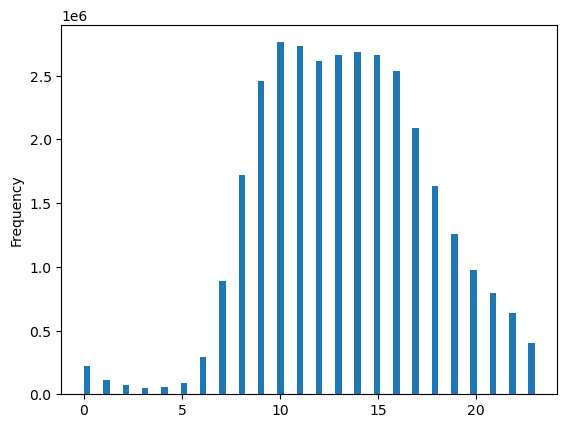

In [11]:
# step 3 create a histogram for the column order_hour_of_day
hist = insta_visual['order_hour_of_day'].plot.hist(bins = 70)

The histogram exhibits the trend of number of orders placed during each hours of the day. The higher peaks between 1000-1700 hours exhibit a trend that the consumers prefer to shop during the workday hours and the orders taper off towards end of the day.

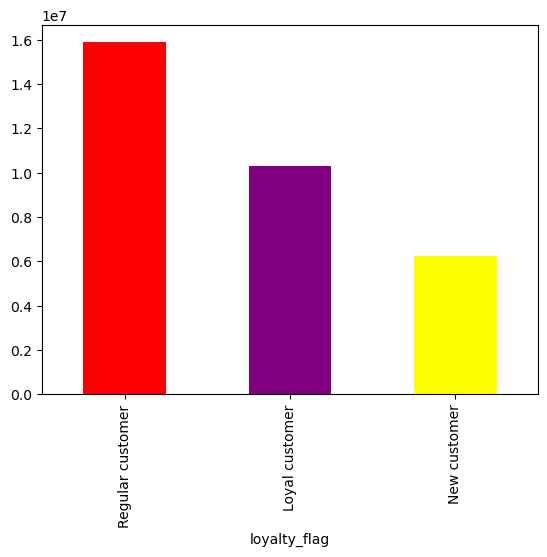

In [17]:
# step 4 create a bar chart using loyalty flag column
bar = insta_visual['loyalty_flag'].value_counts().plot.bar(color = ['red', 'purple', 'yellow'])

# step 5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [19]:
# create a random sample by generating a seed
np.random.seed(4)

In [21]:
# create a dev list to split data 70/30
dev = np.random.rand(len(insta_visual)) <= 0.7

In [23]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [29]:
# store 70% of the sample in the dataframe big
big = insta_visual[dev]

In [31]:
# store 30% of the sample in the dataframe small
small = insta_visual[~dev]

In [33]:
# compare the dataframe length
len(insta_visual)

32404859

In [35]:
len(big) + len(small)

32404859

In [37]:
# reduce the sample for only required column
insta_visual_2 = small[['order_hour_of_day', 'prices']]

In [41]:
insta_visual_2.head(10)

,order_hour_of_day,prices
0,11,5.8
2,21,5.8
3,13,5.8
6,14,5.8
10,11,5.8
12,13,5.8
13,12,5.8
19,0,5.8
21,23,5.8
22,3,5.8


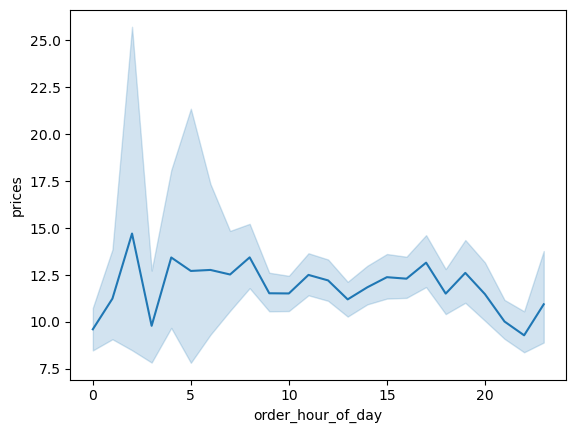

In [45]:
# create a line chart
line = sns.lineplot(data = insta_visual_2, x = 'order_hour_of_day',y = 'prices')

# Task 06. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [47]:
# change the required column in previously reduced 30 % sample data
insta_visual_3 = small [['age','n_dependants']]

In [49]:
insta_visual_3.head(5)

,age,n_dependants
0,81,1
2,66,2
3,40,3
6,20,3
10,61,1


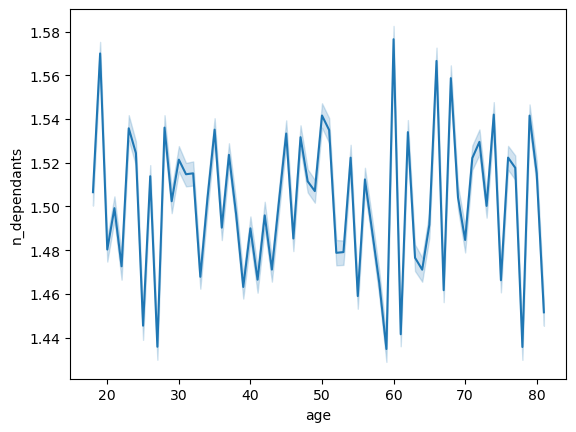

In [51]:
# Create a line chart
line_2 = sns.lineplot(data = insta_visual_3, x = 'age',y = 'n_dependants')

The graph above does not clearly exhibits a clear trend between age and number of dependents. Due to sporadic nature of line graph and no definitive trend line, it is statistically not viable to assertively predict a trend of correlation. 

# Task 07. Explore whether there’s a connection between age and spending power (income) using a scatterplot

In [53]:
# change the previously made sample to only the columns required
insta_visual_4 = small [['age','income']]

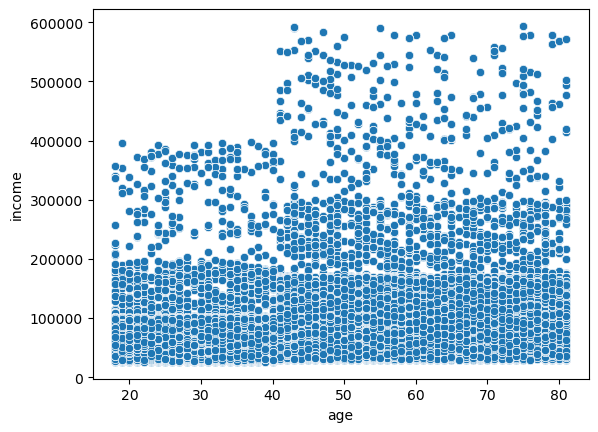

In [55]:
# Create a scatterplot
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = insta_visual_4)

The Scatter plot signifies that the distribution of income is widely spread as the age group increases. The income level is more pronounced in the lower bracket for age groups until 40 and thereafter spurts into higher groups. Also, the density of income below 200K starts lowering as we progress with higher age groups. This hints towards an increase in income with age for a certain percentage of population and due to career progression, thereby indicating the rise in median income across groups. However, it needs to be Statistically analyzed for a better age Vs income correlation and ability to draw up firmer conclusions.

# step 8 Export visualizations as “.png” files in your relevant project folder

In [57]:
# export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day_frequency.png'))

In [59]:
# export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag_distribution.png'))

In [61]:
# save line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hours_of_the_day_price.png'))

In [63]:
# export line_2 chart
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_n_dependent.png'))

In [65]:
# export scatterplot chart
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_and_income.png'))